In [1]:
import pandas as pd 
import math
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from scipy.optimize import curve_fit
from sklearn.model_selection import GridSearchCV
from itertools import product
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize
import warnings #had to supress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
w = pd.read_csv(r'C:\users\guido\OneDrive\Desktop\Guido\Datasets\diabetes2.csv') 
w.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

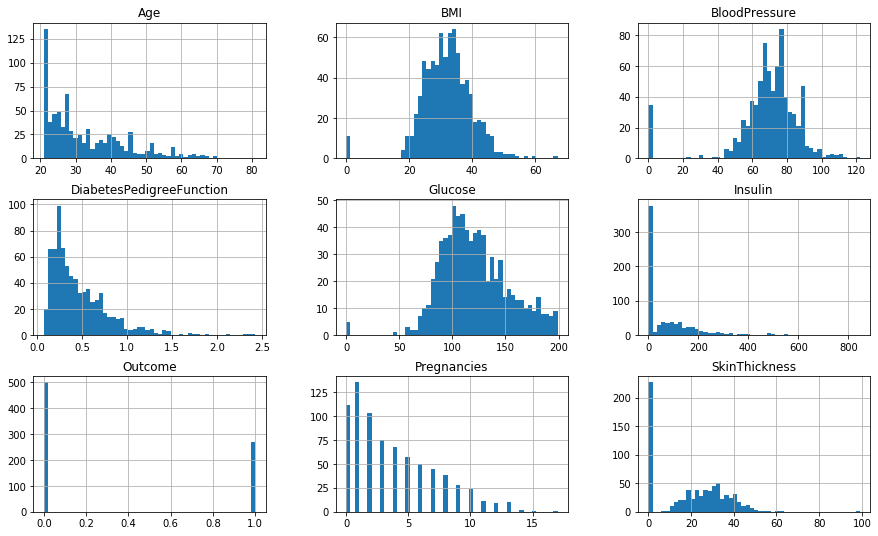

In [3]:
w.hist(figsize=(15,9),bins=50)
X = w.iloc[:, :8].values  #load the first two features of the iris data 
y = w.iloc[:, 8].values  #load the target of the iris data

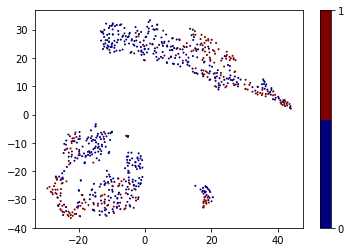

In [6]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(X)
vis_x = tsne_obj[:, 0]
vis_y = tsne_obj[:, 1]
plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 2), s = 1)
plt.colorbar(ticks=range(2))
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.25, random_state=0) 

In [9]:
svc_clf = SVC(kernel = 'linear', random_state = 0) 
svc_clf.fit(X_train_2, y_train_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
lr_clf = LogisticRegression(random_state = 0).fit(X_train_2, y_train_2)
print ('Coeff LR: ', lr_clf.coef_)

Coeff LR:  [[ 0.10199701  0.02221164 -0.020215    0.01444857 -0.00098682  0.04460265
   0.36788474  0.00672142]]


Accuracy of SVC: 0.7777777777777778


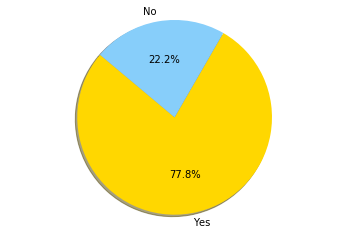

Accuracy of LR: 0.7777777777777778


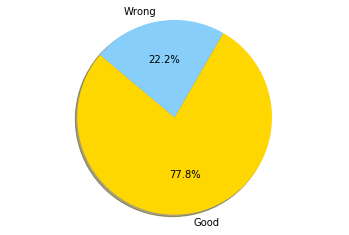

In [11]:
#performance of SVC vs LogisticRegression
svc_pred = svc_clf.predict(X_test_2)

print ('Accuracy of SVC:', accuracy_score(y_test_2,svc_pred))
yes = 0
for i in range(0, svc_pred.size):
    if svc_pred[i] == y_test_2[i]:
        yes = yes + 1

labels = 'Yes', 'No'
sizes = [yes, svc_pred.size - yes]
colors = ['gold','lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()    

lr_pred = lr_clf.predict(X_test_2)
lr_prob = lr_clf.predict_proba(X_test_2)

print ('Accuracy of LR:', accuracy_score(y_test_2,lr_pred))
yes = 0
for i in range(0, lr_pred.size):
    if svc_pred[i] == y_test_2[i]:
        yes = yes + 1

labels = 'Good', 'Wrong'
sizes = [yes, lr_pred.size - yes]
colors = ['gold','lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()    

In [17]:
print ('Accuracy of SVC on original Test Set: ',accuracy_score(y_test, svc_clf.predict(X_test)))

Accuracy of SVC on original Test Set:  0.796875


In [18]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=4) 
svc_scores

array([0.75862069, 0.77241379, 0.72727273, 0.76923077])

In [19]:
print ('Average SVC scores: ', svc_scores.mean()) 
print ('Standard Deviation of SVC scores:', svc_scores.std())

Average SVC scores:  0.7568844948155293
Standard Deviation of SVC scores: 0.017842790888631447


In [20]:
lr_scores = cross_val_score(lr_clf, X_train, y_train, cv=4) 
print ('Average LR scores: ', lr_scores.mean())
print ('Standard Deviation of LR scores: ', lr_scores.std())

Average LR scores:  0.7533397636845912
Standard Deviation of LR scores:  0.027907292694692474


In [15]:
confusion_matrix(y_test_2, lr_pred,labels = [1,0]) #here's the accuracy of logistic regression

array([[29, 26],
       [ 6, 83]], dtype=int64)

In [16]:
#Minimizing logistic regression error
y_pred_proba = lr_clf.predict_proba(X_test)
y_pred_proba #array of probabilities

array([[0.1436191 , 0.8563809 ],
       [0.76544373, 0.23455627],
       [0.84997749, 0.15002251],
       [0.46224185, 0.53775815],
       [0.84615549, 0.15384451],
       [0.90792127, 0.09207873],
       [0.32843036, 0.67156964],
       [0.36017441, 0.63982559],
       [0.61829599, 0.38170401],
       [0.62552325, 0.37447675],
       [0.48329049, 0.51670951],
       [0.16824805, 0.83175195],
       [0.74817902, 0.25182098],
       [0.76143763, 0.23856237],
       [0.79206916, 0.20793084],
       [0.79709388, 0.20290612],
       [0.20101402, 0.79898598],
       [0.90831672, 0.09168328],
       [0.6284245 , 0.3715755 ],
       [0.63711861, 0.36288139],
       [0.45489831, 0.54510169],
       [0.70756561, 0.29243439],
       [0.54919617, 0.45080383],
       [0.88733025, 0.11266975],
       [0.88533998, 0.11466002],
       [0.59156348, 0.40843652],
       [0.9180393 , 0.0819607 ],
       [0.19011237, 0.80988763],
       [0.79265387, 0.20734613],
       [0.79542483, 0.20457517],
       [0.

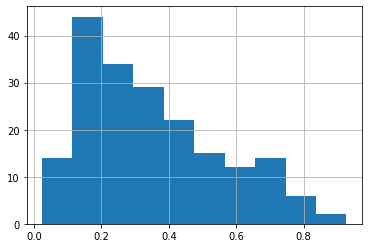

In [17]:
pd.Series(y_pred_proba[:,1]).hist()

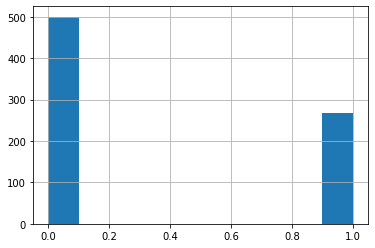

In [18]:
w['Outcome'].hist()


In [19]:
y_pred_default = binarize(y_pred_proba, threshold=0.5)
y_pred_default #this is probability for the output (Default logistic regression)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [20]:
y_pred_low = binarize(y_pred_proba, threshold=0.2)
confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])
#less accuracy but more saved from the negative results of diabetes!!

array([[61,  1],
       [79, 51]], dtype=int64)

In [21]:
def npv_func(th): #NPV function for accuracy of threshold
    y_pred_low = binarize(y_pred_proba, threshold=th)
    second_column = confusion_matrix(y_test,y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    return npv

In [22]:
npv_func(0.2)

0.9807692307692307

In [23]:
npv_func(0.22)

0.9682539682539683

In [24]:
npv_func(0.18) #Most accuracy!!

1.0

In [25]:
npv_func(0.19)

0.9782608695652174

C:\Users\MHI6\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\MHI6\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\MHI6\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


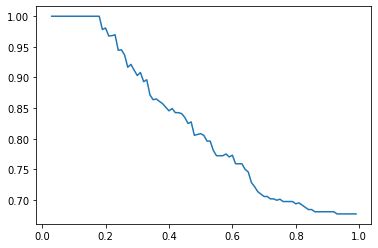

In [26]:
#Plotting NPV function
ths = np.arange(0,1,0.01)
npvs = []
for th in np.arange(0,1.00,0.01):
    npvs.append(npv_func(th))
plt.plot(ths,npvs)

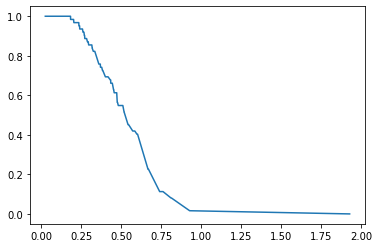

In [27]:
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(ths,tpr)

In [28]:
y_pred_low = binarize(y_pred_proba, threshold=0.18) #best one
confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])
#when the test predicts that someone has diabetes, it is very inaccurate

array([[62,  0],
       [92, 38]], dtype=int64)

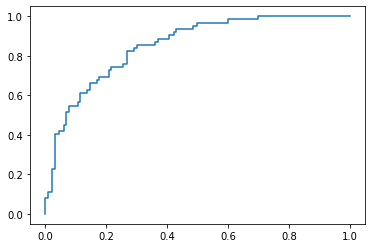

In [29]:
plt.plot(fpr,tpr) #ROC plotting

In [30]:
auc(fpr,tpr) #AUC

0.851985111662531

In [12]:
def model(x):
    return 1 / (1 + np.e**(-x))

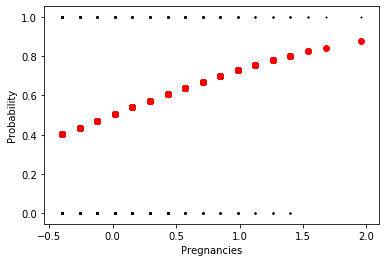

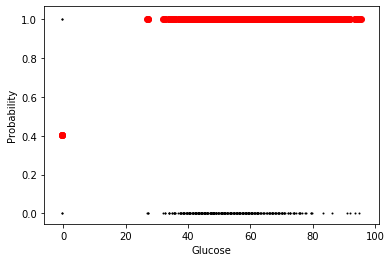

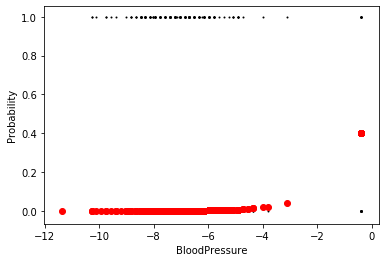

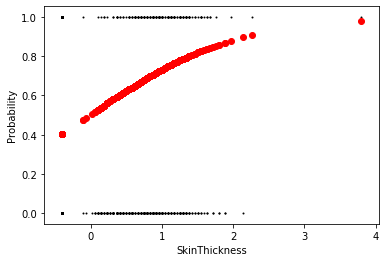

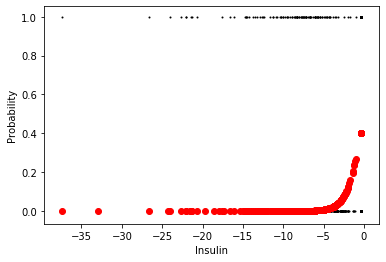

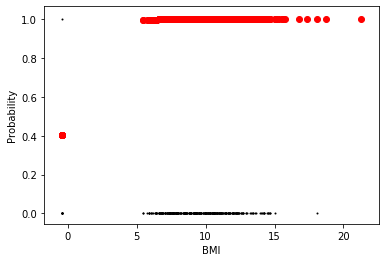

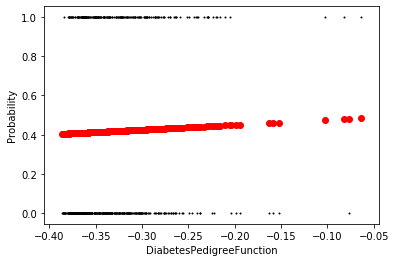

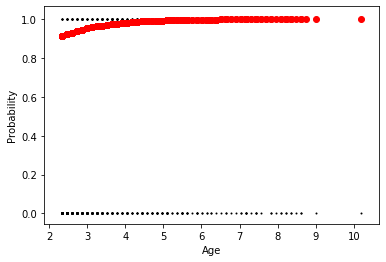

In [18]:
for i in range (8):
    
    cv = StratifiedShuffleSplit(n_splits=7, test_size=0.2, random_state=7) #cross validation
    logregpipe = Pipeline([('scale', StandardScaler()), ('logreg',LogisticRegression(multi_class="multinomial",solver="lbfgs"))])
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] #5 parameters for cross validation tries
    param_grid = dict(logreg__C=Cs)
    logreg_cv = GridSearchCV(logregpipe,param_grid = param_grid,cv=cv)
    logreg_cv.fit(X_train,y_train)
    
    bestlogreg = logreg_cv.best_estimator_
    bestlogreg.fit(X_train,y_train)
    bestlogreg.coef_ = bestlogreg.named_steps['logreg'].coef_
    bestlogreg.intercept_ = bestlogreg.named_steps['logreg'].intercept_

    loss = model(X_train * bestlogreg.coef_ + bestlogreg.intercept_)
    tmp = X_train * bestlogreg.coef_ + bestlogreg.intercept_
    plt.scatter(tmp[:,i], y_train, s = 1, color = 'black')
    plt.scatter(tmp[:,i], loss[:,i], color = 'red')
    plt.xlabel(w.columns.values[i])
    plt.ylabel('Probability')
    plt.show()

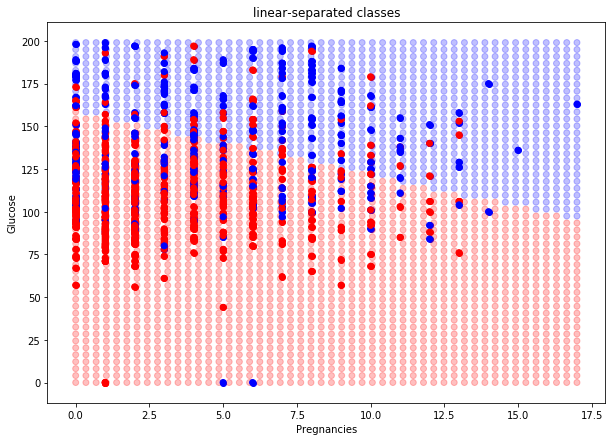

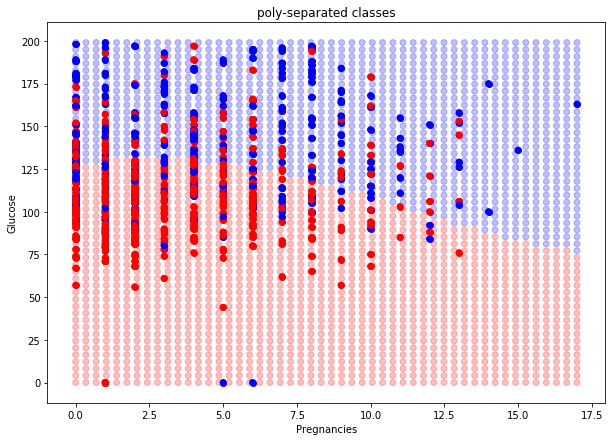

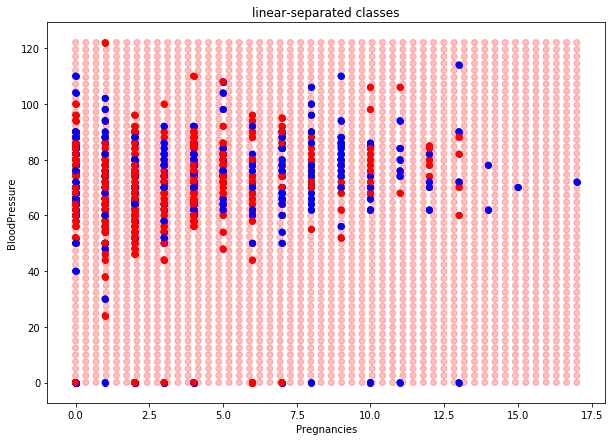

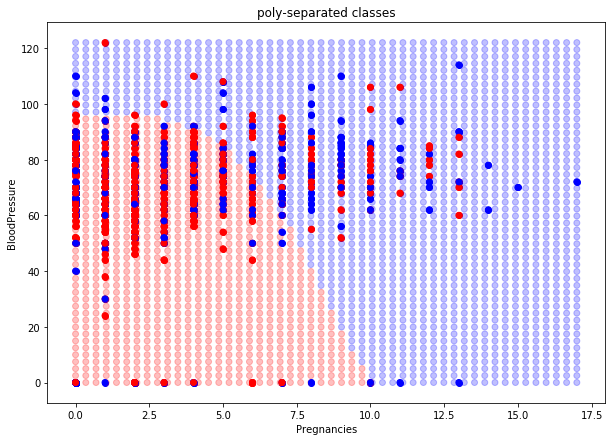

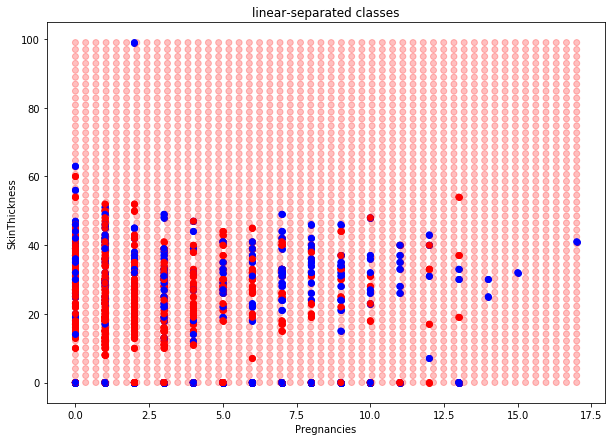

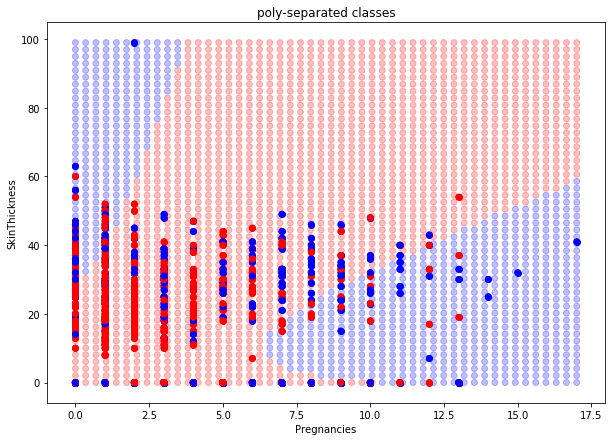

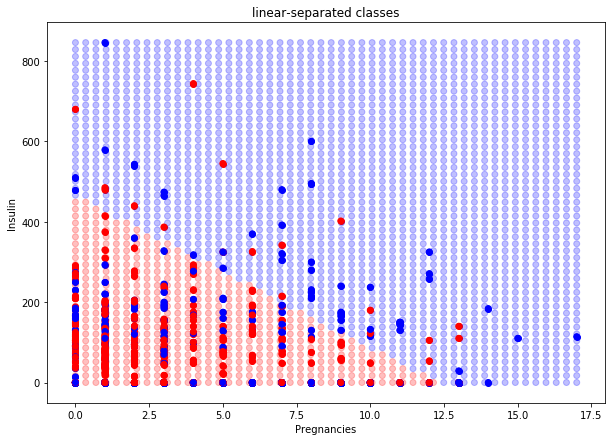

In [ ]:
#SVC linear decision boundary

k = ['linear', 'poly']
for pair in list([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [2, 3], [2, 4],[2, 5],[2, 6],[2, 7],[3, 4],[3, 5],[3, 6],[3, 7],[4, 5],[4, 6],[4, 7],[5, 6],[5, 7]]):
    X_2 = w.iloc[:, pair].values
    
    Xy1 = X_2[y==0]
    Xy2 = X_2[y==1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=7,stratify=y)
    xmin, xmax = np.percentile(X_2[:, 0], [0, 100])
    ymin, ymax = np.percentile(X_2[:, 1], [0, 100])
    
    test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
    
    i=0
    for i in range(2):
        svm_inst = SVC(kernel=k[i])
        svm_inst.fit(X_train,y_train)
        test_preds = svm_inst.predict(test_points)

        plt.figure(figsize=(10,7)) #change figure-size for easier viewing
        plt.scatter(Xy1[:,0],Xy1[:,1], color = 'red')
        plt.scatter(Xy2[:,0],Xy2[:,1], color = 'blue')
        colors = np.array(['r', 'b'])
        plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
        plt.xlabel(w.columns.values[pair[0]])
        plt.ylabel(w.columns.values[pair[1]])
        plt.scatter(X_2[:, 0], X_2[:, 1], color=colors[y])
        plt.title('%s-separated classes' %(k[i]))
        plt.show()

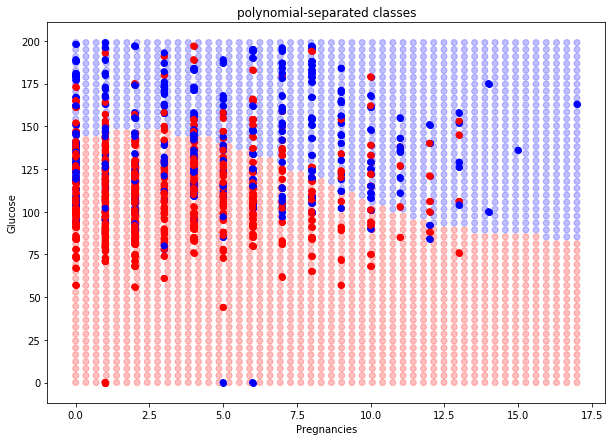

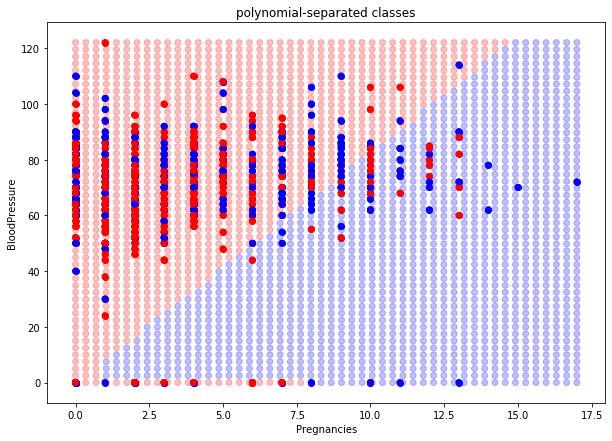

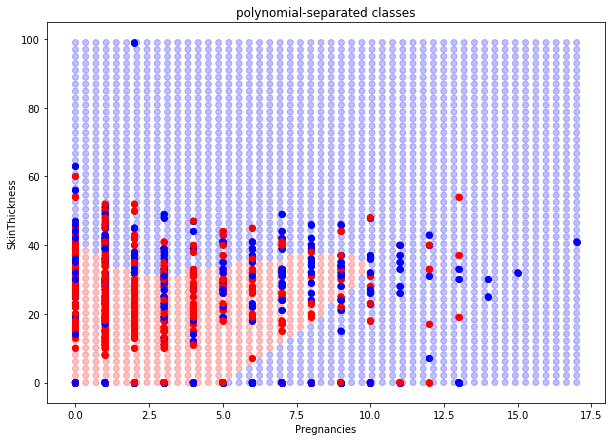

In [ ]:
#SVC poly decision boundary

for pair in list([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [2, 3], [2, 4],[2, 5],[2, 6],[2, 7],[3, 4],[3, 5],[3, 6],[3, 7],[4, 5],[4, 6],[4, 7],[5, 6],[5, 7]]):
    X_2 = w.iloc[:, pair].values
    
    Xy1 = X_2[y==0]
    Xy2 = X_2[y==1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.8, random_state=7,stratify=y) #test size bigger than linear one, because otherwise it's too slow!!
    xmin, xmax = np.percentile(X_2[:, 0], [0, 100])
    ymin, ymax = np.percentile(X_2[:, 1], [0, 100])
    
    test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
    
    svm_inst = SVC(kernel='poly') #if >3 way too slow!!
    svm_inst.fit(X_train,y_train)

    test_preds = svm_inst.predict(test_points)

    plt.figure(figsize=(10,7)) #change figure-size for easier viewing
    plt.scatter(Xy1[:,0],Xy1[:,1], color = 'red')
    plt.scatter(Xy2[:,0],Xy2[:,1], color = 'blue')

    colors = np.array(['r', 'b'])
    plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
    plt.xlabel(w.columns.values[pair[0]])
    plt.ylabel(w.columns.values[pair[1]])
    plt.scatter(X_2[:, 0], X_2[:, 1], color=colors[y])
    plt.title("polynomial-separated classes")
    plt.show()

In [47]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())])

In [48]:
#the SVC prediction performance is optimized over the following parameters:
#C, gamma, and the shape of the kernel. C describes the margin of the SVM and is set to one
#by default. The margin is the empty space on either side of the hyperplane with no class
#examples. If your dataset has many noisy observations, try higher Cs with cross-validation.
#C is proportional to error on the margin, and as C gets higher in value, the SVM will try to
#make the margin smaller.
Cs = [0.001, 0.01, 0.1, 1, 10] #there are the tries that we want that the grid does
gammas = [0.001, 0.01, 0.1, 1, 10]

In [49]:
param_grid = dict(svc__gamma=gammas, svc__C=Cs)

In [51]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7) #cross validation scheme
# The n_splits parameter refers to the number of splits, or tries, the dataset will be split into.
# The test_size parameter is how much data will be left out for testing within the fold.
#The most important element of the stratified shuffle is that each fold preserves the proportion of samples for each class.

In [55]:
#There are three required elements for a grid search:
#An estimator
#A parameter grid
#A cross-validation scheme

grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv) #recursive search for the best parameters
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None,

In [58]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.751219512195122
{'svc__C': 1, 'svc__gamma': 0.01}


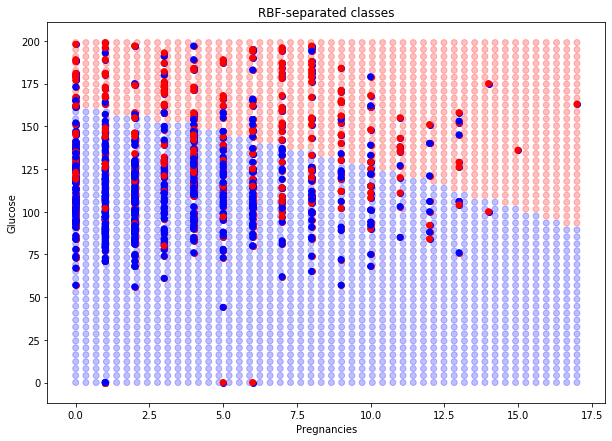

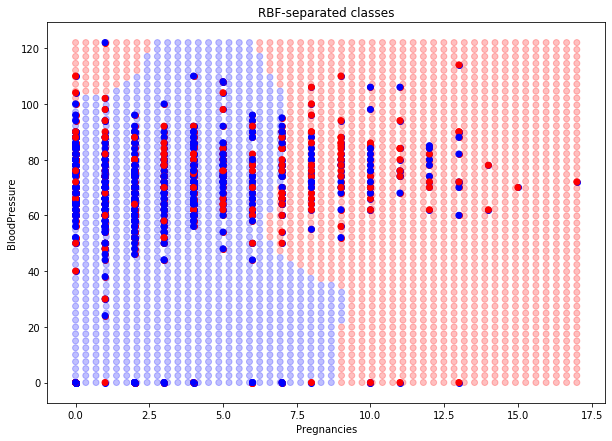

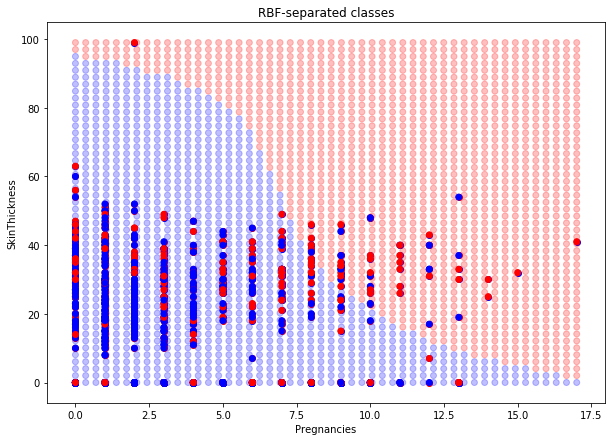

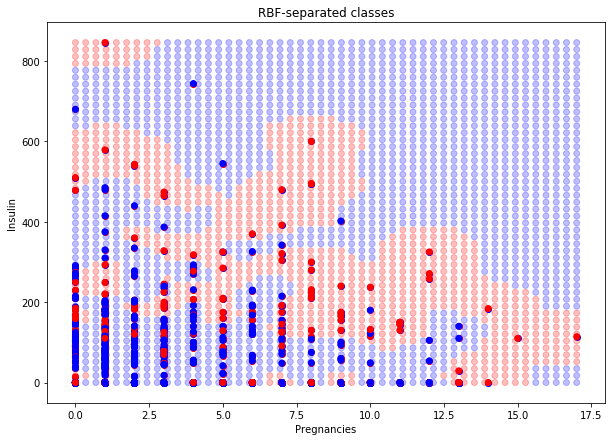

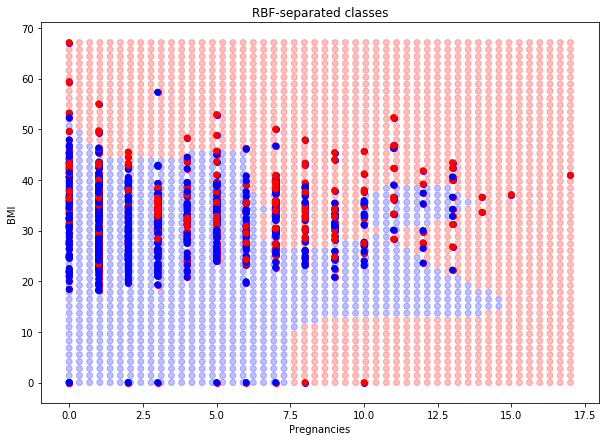

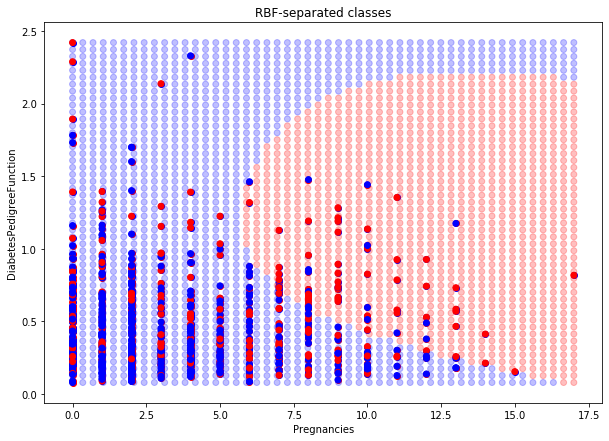

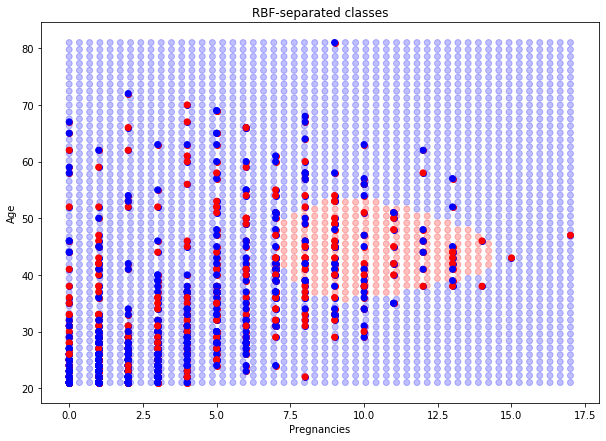

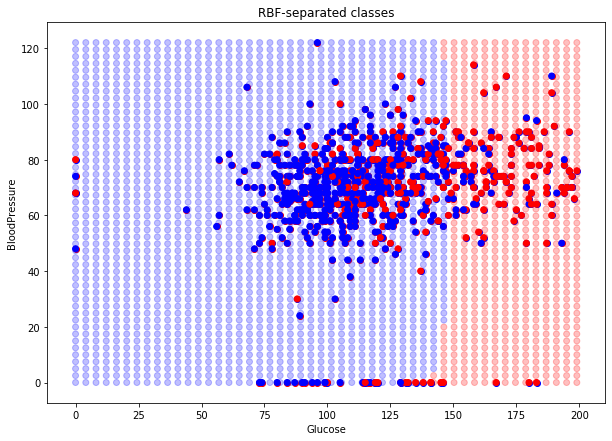

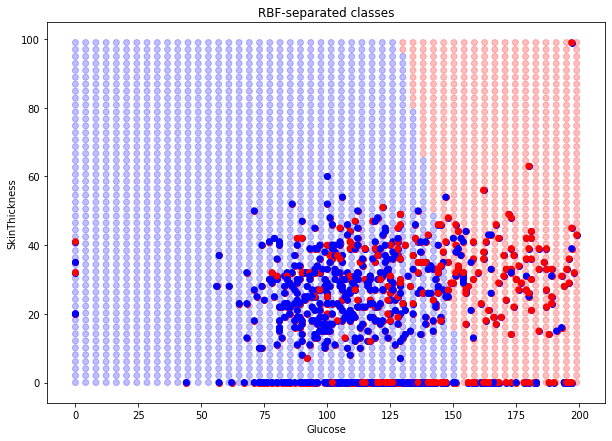

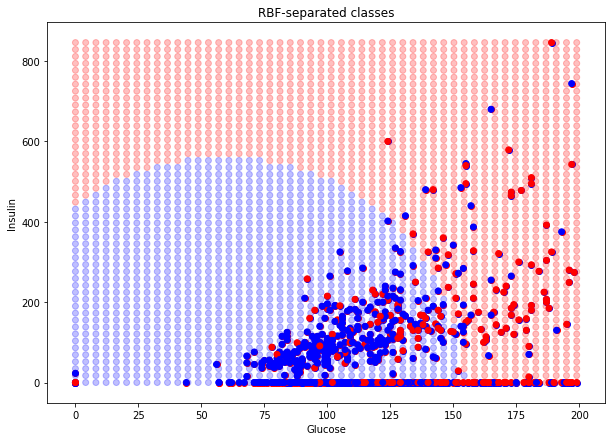

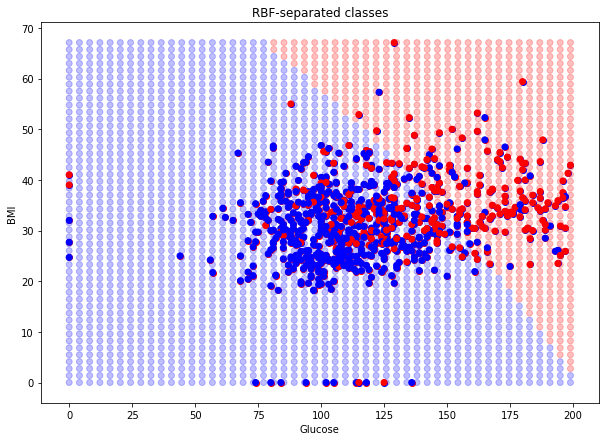

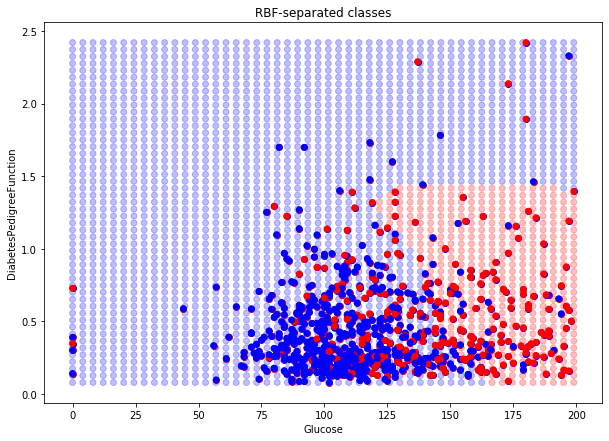

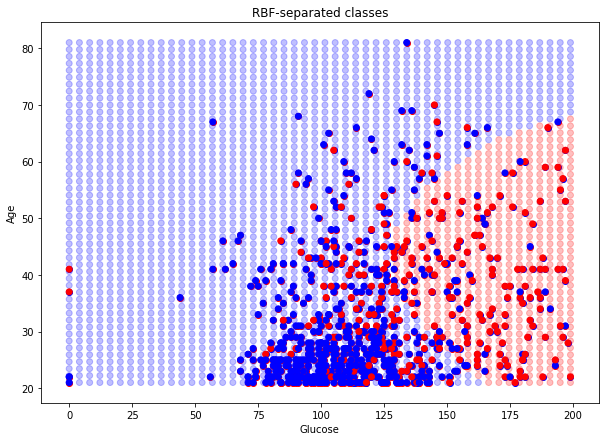

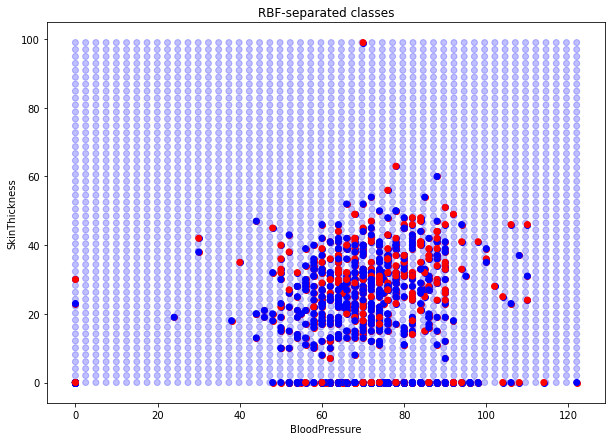

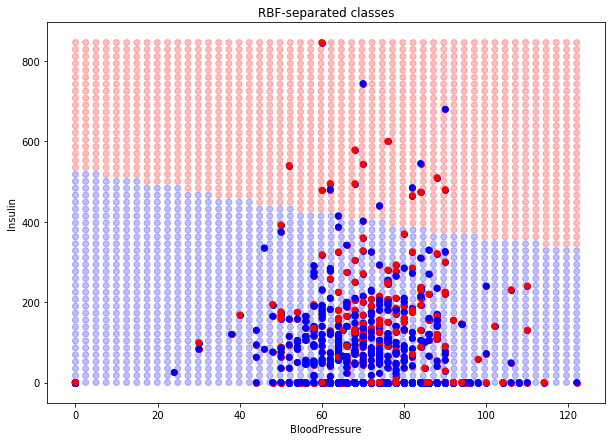

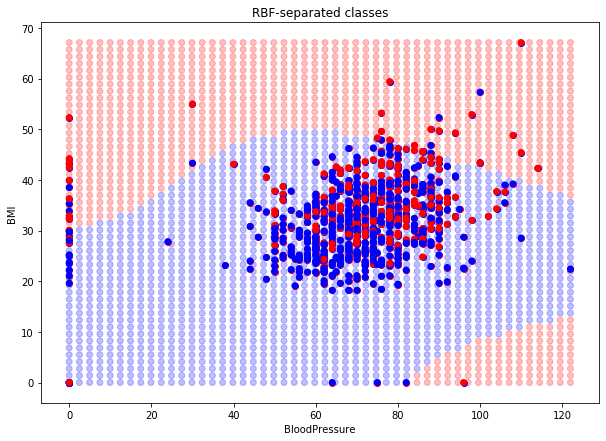

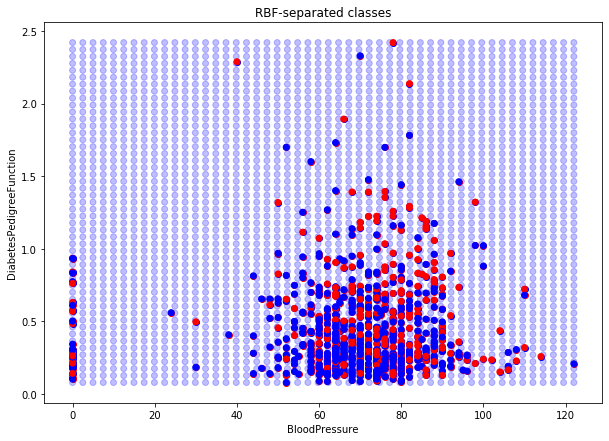

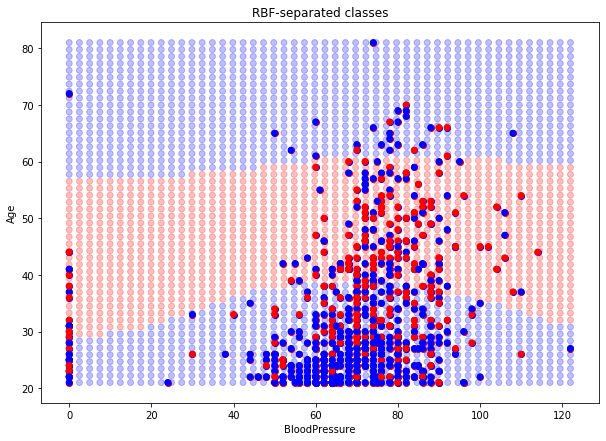

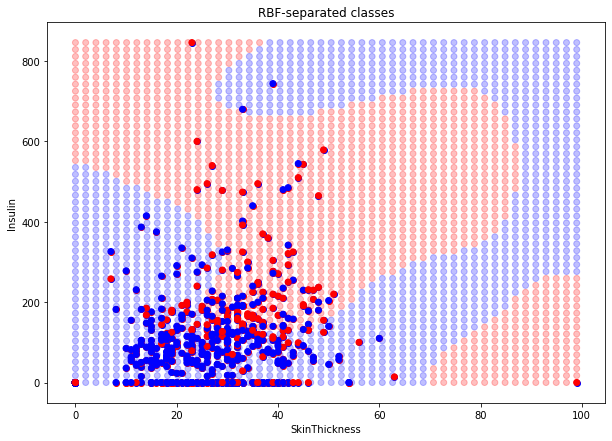

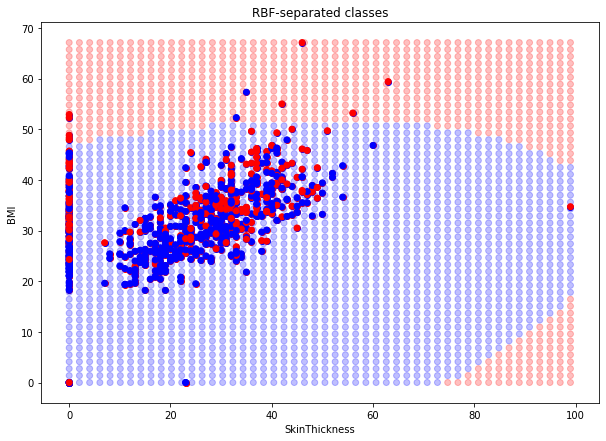

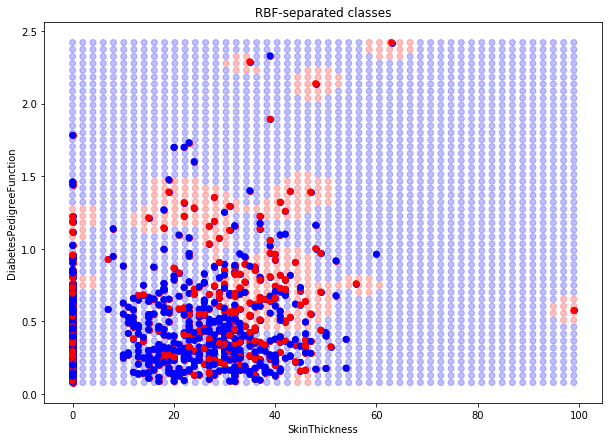

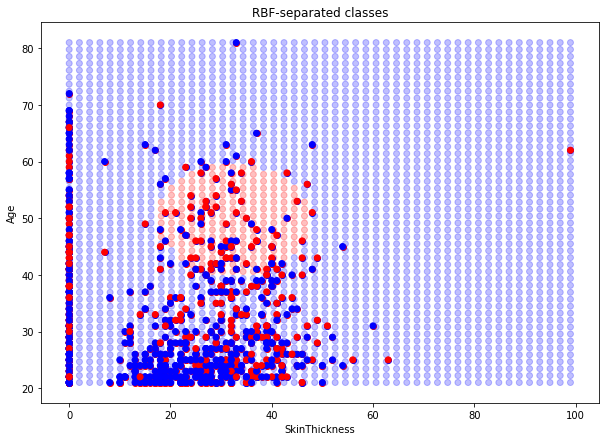

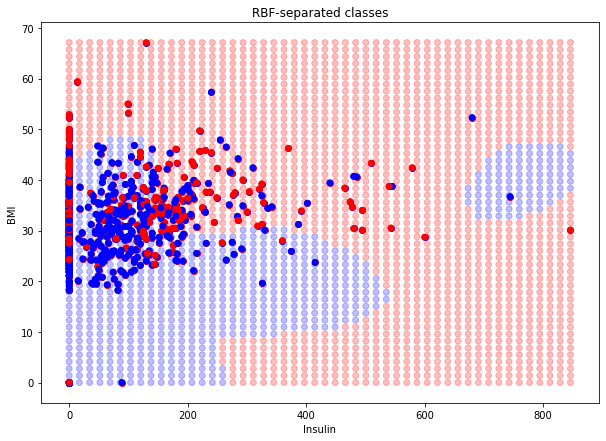

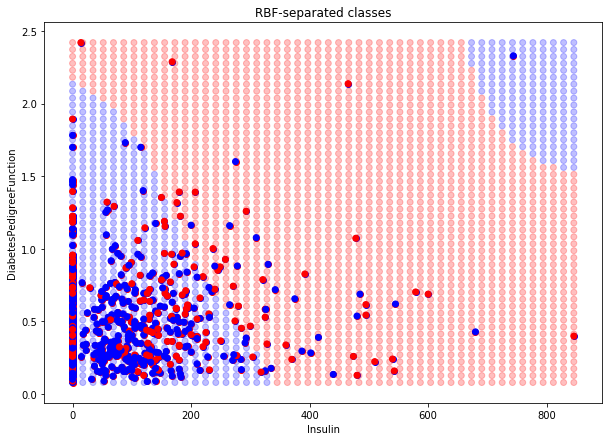

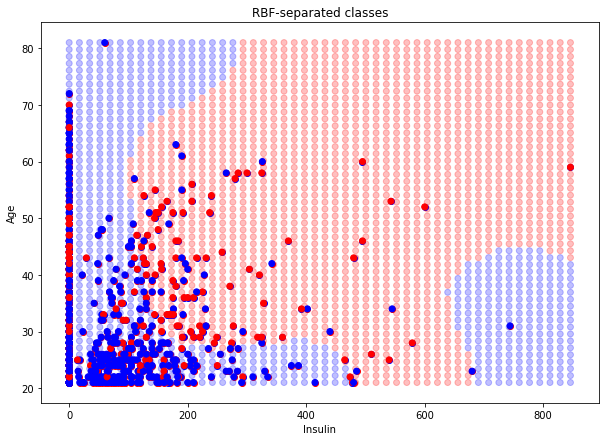

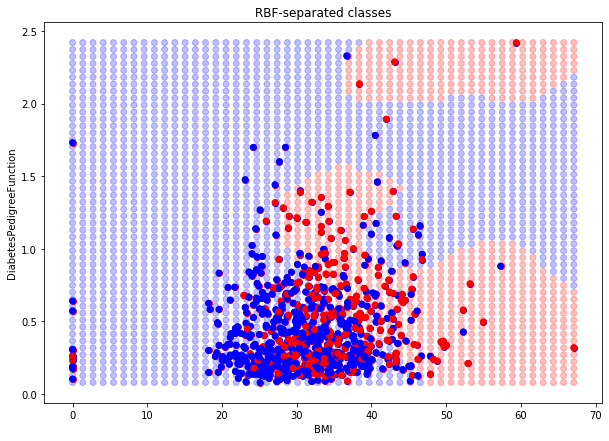

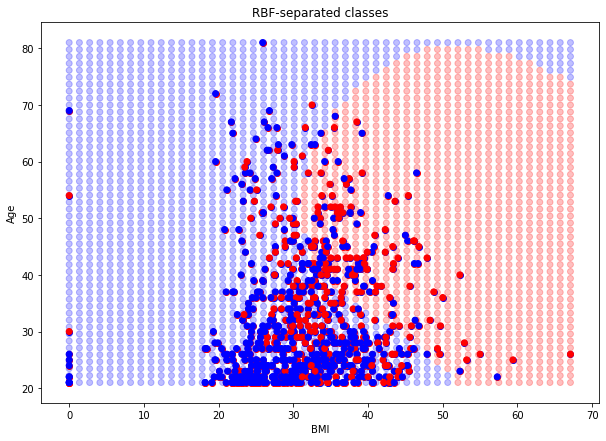

In [4]:
for pair in list([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [2, 3], [2, 4],[2, 5],[2, 6],[2, 7],[3, 4],[3, 5],[3, 6],[3, 7],[4, 5],[4, 6],[4, 7],[5, 6],[5, 7]]):
    
    X_2 = X[:,pair]

    Xy1 = X_2[y==0]
    Xy2 = X_2[y==1]

    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=7,stratify=y)
    xmin, xmax = np.percentile(X_2[:, 0], [0, 100])
    ymin, ymax = np.percentile(X_2[:, 1], [0, 100])

    svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel="rbf"))])
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7) #cross validation
    Cs = [0.001, 0.01, 0.1, 1, 10] #5 parameters for cross validation tries
    gammas = [0.001, 0.01, 0.1, 1, 10]
    param_grid = dict(svc__gamma=gammas, svc__C=Cs) #i give parameters to grid

    grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv) #searching..
    grid_cv.fit(X_train, y_train)

    test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
    test_preds = grid_cv.predict(test_points)

    plt.figure(figsize=(10,7)) #change figure-size for easier viewing
    plt.scatter(Xy1[:,0],Xy1[:,1], color = 'red')
    plt.scatter(Xy2[:,0],Xy2[:,1], color = 'blue')
    
    colors = np.array(['r', 'b'])
    plt.scatter(test_points[:, 0], test_points[:, 1],
    color=colors[test_preds-1], alpha=0.25)
    plt.xlabel(w.columns.values[pair[0]])
    plt.ylabel(w.columns.values[pair[1]])
    plt.scatter(X_2[:, 0], X_2[:, 1], color=colors[y-1])
    plt.title("RBF-separated classes")
    plt.show()